# Análise de Dados Musicais

## Limpeza e Preparação dos Dados

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('music.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [6]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [7]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop(columns=["Unnamed: 0"])

In [11]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y")

In [12]:
df["genre"] = df["genre"].str.lower().str.strip()
df["topic"] = df["topic"].str.lower().str.strip()

In [13]:
# ============================================
# FUNÇÃO PARA GERAR RELATÓRIO COMPLETO
# ============================================

def verificar_qualidade_dados(df):
    """
    Verifica a qualidade e ranges de todas as features
    """
    
    print("=" * 80)
    print("RELATÓRIO DE QUALIDADE DE DADOS".center(80))
    print("=" * 80)
    
    # Definir ranges esperados
    ranges_esperados = {
        'danceability': (0, 1),
        'acousticness': (0, 1),
        'instrumentalness': (0, 1),
        'valence': (0, 1),
        'energy': (0, 1),
        'loudness': (-60, 5),
        'len': (1, 1000),  # 1 segundo a ~16 minutos
        'age': (0, 100)
    }
    
    problemas = []
    
    for coluna, (min_esperado, max_esperado) in ranges_esperados.items():
        if coluna in df.columns:
            min_real = df[coluna].min()
            max_real = df[coluna].max()
            
            print(f"\n📊 {coluna.upper()}")
            print(f"   Range esperado: [{min_esperado}, {max_esperado}]")
            print(f"   Range encontrado: [{min_real:.3f}, {max_real:.3f}]")
            
            # Verificar se está fora do range
            fora_min = df[df[coluna] < min_esperado].shape[0]
            fora_max = df[df[coluna] > max_esperado].shape[0]
            
            if fora_min > 0:
                print(f"   ⚠️  {fora_min} valores ABAIXO do mínimo esperado")
                problemas.append(f"{coluna}: {fora_min} valores < {min_esperado}")
                
            if fora_max > 0:
                print(f"   ⚠️  {fora_max} valores ACIMA do máximo esperado")
                problemas.append(f"{coluna}: {fora_max} valores > {max_esperado}")
            
            if fora_min == 0 and fora_max == 0:
                print(f"   ✅ Todos os valores dentro do range esperado")
    
    # Verificar features temáticas
    print(f"\n\n{'='*80}")
    print("FEATURES TEMÁTICAS".center(80))
    print(f"{'='*80}")
    
    temas = [col for col in df.columns if col in [
        'dating', 'violence', 'world/life', 'night/time',
        'shake the audience', 'family/gospel', 'romantic', 
        'communication', 'obscene', 'music', 'movement/places', 
        'light/visual perceptions', 'family/spiritual', 
        'like/girls', 'sadness', 'feelings'
    ]]
    
    for tema in temas:
        min_val = df[tema].min()
        max_val = df[tema].max()
        negativos = df[df[tema] < 0].shape[0]
        
        status = "✅" if negativos == 0 and min_val >= 0 else "⚠️"
        print(f"{status} {tema}: [{min_val:.3f}, {max_val:.3f}]", end="")
        
        if negativos > 0:
            print(f" - {negativos} VALORES NEGATIVOS!", end="")
            problemas.append(f"{tema}: {negativos} valores negativos")
        print()
    
    # Resumo final
    print(f"\n\n{'='*80}")
    print("RESUMO".center(80))
    print(f"{'='*80}\n")
    
    if len(problemas) == 0:
        print("🎉 PARABÉNS! Nenhum problema encontrado nos dados!")
    else:
        print(f"⚠️  {len(problemas)} problema(s) encontrado(s):\n")
        for i, problema in enumerate(problemas, 1):
            print(f"   {i}. {problema}")
    
    print(f"\n{'='*80}\n")

# Executar a verificação
verificar_qualidade_dados(df)

                        RELATÓRIO DE QUALIDADE DE DADOS                         

📊 DANCEABILITY
   Range esperado: [0, 1]
   Range encontrado: [0.005, 0.994]
   ✅ Todos os valores dentro do range esperado

📊 ACOUSTICNESS
   Range esperado: [0, 1]
   Range encontrado: [0.000, 1.000]
   ✅ Todos os valores dentro do range esperado

📊 INSTRUMENTALNESS
   Range esperado: [0, 1]
   Range encontrado: [0.000, 0.997]
   ✅ Todos os valores dentro do range esperado

📊 VALENCE
   Range esperado: [0, 1]
   Range encontrado: [0.000, 1.000]
   ✅ Todos os valores dentro do range esperado

📊 ENERGY
   Range esperado: [0, 1]
   Range encontrado: [0.000, 1.000]
   ✅ Todos os valores dentro do range esperado

📊 LOUDNESS
   Range esperado: [-60, 5]
   Range encontrado: [0.000, 1.000]
   ✅ Todos os valores dentro do range esperado

📊 LEN
   Range esperado: [1, 1000]
   Range encontrado: [1.000, 199.000]
   ✅ Todos os valores dentro do range esperado

📊 AGE
   Range esperado: [0, 100]
   Range encontrado: [

In [14]:
# Verificar em que unidade está 'len'
print("Primeiras linhas de 'len':")
print(df['len'].head(10))
print(f"\nMédia: {df['len'].mean():.2f}")
print(f"Min: {df['len'].min()}")
print(f"Max: {df['len'].max()}")

Primeiras linhas de 'len':
0     95
1     51
2     24
3     54
4     48
5     98
6    179
7     21
8     30
9     61
Name: len, dtype: int64

Média: 73.03
Min: 1
Max: 199


## Análise de Correlação

In [15]:
print(df.describe())

                        release_date           len        dating  \
count                          28372  28372.000000  28372.000000   
mean   1990-03-28 09:36:00.609051136     73.028444      0.021112   
min              1950-01-01 00:00:00      1.000000      0.000291   
25%              1975-01-01 00:00:00     42.000000      0.000923   
50%              1991-01-01 00:00:00     63.000000      0.001462   
75%              2007-01-01 00:00:00     93.000000      0.004049   
max              2019-01-01 00:00:00    199.000000      0.647706   
std                              NaN     41.829831      0.052370   

           violence    world/life    night/time  shake the audience  \
count  28372.000000  28372.000000  28372.000000        28372.000000   
mean       0.118396      0.120973      0.057387            0.017422   
min        0.000284      0.000291      0.000289            0.000284   
25%        0.001120      0.001170      0.001032            0.000993   
50%        0.002506      0.00657

In [16]:
print(df.groupby("genre")[["danceability", "energy", "valence"]].mean())

         danceability    energy   valence
genre                                    
blues        0.480965  0.581534  0.545578
country      0.539954  0.466350  0.533004
hip hop      0.729100  0.703236  0.603754
jazz         0.516471  0.463430  0.467085
pop          0.525376  0.601097  0.532396
reggae       0.705711  0.589931  0.706386
rock         0.463619  0.700954  0.458340


#### criação da coluna decade

In [17]:
df["decade"] = (df["release_date"].dt.year // 10) * 10

#### resultado mostra como essas características musicais variaram ao longo das décadas:

In [18]:
print(df.groupby("decade")[["danceability", "energy", "valence"]].mean())

        danceability    energy   valence
decade                                  
1950        0.470689  0.312325  0.499630
1960        0.485890  0.414836  0.564931
1970        0.510577  0.524892  0.579475
1980        0.538657  0.583139  0.569479
1990        0.539857  0.586370  0.521222
2000        0.544614  0.655217  0.507281
2010        0.575267  0.665913  0.489945


In [19]:
# Preparar dados
df_decades = df.groupby("decade")[["danceability", "energy", "valence"]].mean().reset_index()

# Transformar para formato longo (necessário para seaborn)
df_melted = df_decades.melt(
    id_vars='decade', 
    value_vars=['danceability', 'energy', 'valence'],
    var_name='Feature',
    value_name='Value'
)

# Criar figura
plt.figure(figsize=(12, 6))

# Usar lineplot do seaborn
sns.lineplot(
    data=df_melted, 
    x='decade', 
    y='Value', 
    hue='Feature',
    marker='o',
    markersize=10,
    linewidth=3,
    palette={'danceability': '#FF6B6B', 
             'energy': '#4ECDC4', 
             'valence': '#FFE66D'}
)

plt.xlabel('Década', fontsize=14, fontweight='bold')
plt.ylabel('Valor Médio (0-1)', fontsize=14, fontweight='bold')
plt.title('Evolução das Características Musicais', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(title='Característica', fontsize=12, title_fontsize=12, 
          loc='best', frameon=True, shadow=True)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'backends'

Error in callback <function _enable_matplotlib_integration.<locals>.configure_once at 0x00000247869C4900> (for post_run_cell), with arguments args (<ExecutionResult object at 247869acc90, execution_count=19 error_before_exec=None error_in_exec=module 'matplotlib' has no attribute 'backends' info=<ExecutionInfo object at 2478607c450, raw_cell="# Preparar dados
df_decades = df.groupby("decade").." transformed_cell="# Preparar dados
df_decades = df.groupby("decade").." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/c%3A/Users/Yasmin/Documents/Faculdade/4%C2%B0%20Semestre/Probabilidade%20e%20estat%C3%ADstica/musicData/analise.ipynb#X30sZmlsZQ%3D%3D> result=None>,),kwargs {}:


AttributeError: module 'matplotlib' has no attribute 'backends'

In [ ]:
songs_decade = df["decade"].value_counts().sort_index()
top_genres = df["genre"].value_counts().head(10)
top_artists = df["artist_name"].value_counts().head(10)
top_topics = df["topic"].value_counts().head(10)

print("Músicas por década:")
print(songs_decade)
print("\nTop 10 gêneros:")
print(top_genres)
print("\nTop 10 artistas:")
print(top_artists)
print("\nTop 10 tópicos:")
print(top_topics)

Músicas por década:
decade
1950    1468
1960    3409
1970    3951
1980    4675
1990    4457
2000    4781
2010    5631
Name: count, dtype: int64

Top 10 gêneros:
genre
pop        7042
country    5445
blues      4604
rock       4034
jazz       3845
reggae     2498
hip hop     904
Name: count, dtype: int64

Top 10 artistas:
artist_name
johnny cash        190
ella fitzgerald    188
dean martin        146
willie nelson      131
george jones       107
elvis presley       97
dolly parton        96
waylon jennings     95
george strait       92
nina simone         82
Name: count, dtype: int64

Top 10 tópicos:
topic
sadness       6096
violence      5710
world/life    5420
obscene       4882
music         2303
night/time    1825
romantic      1524
feelings       612
Name: count, dtype: int64


#### indica possíveis padrões ou dependências entre essas colunas

In [ ]:
corr = df[["danceability", "energy", "valence", "loudness", "acousticness", "instrumentalness"]].corr()
print(corr)

                  danceability    energy   valence  loudness  acousticness  \
danceability          1.000000  0.016277  0.493627  0.041380     -0.123475   
energy                0.016277  1.000000  0.280487  0.773135     -0.720045   
valence               0.493627  0.280487  1.000000  0.133451     -0.172910   
loudness              0.041380  0.773135  0.133451  1.000000     -0.539738   
acousticness         -0.123475 -0.720045 -0.172910 -0.539738      1.000000   
instrumentalness     -0.083308  0.005606 -0.077332 -0.132534      0.007762   

                  instrumentalness  
danceability             -0.083308  
energy                    0.005606  
valence                  -0.077332  
loudness                 -0.132534  
acousticness              0.007762  
instrumentalness          1.000000  


Alta Energy (1.0)
            |
    Angry/  |  Happy/
    Tense   |  Energetic
            |
─────────────────────── Valence
            |
    Sad/    |  Peaceful/
    Calm    |  Content
            |
      Baixa Energy (0.0)

Baixa Valence        Alta Valence
   (Triste)            (Feliz)

In [ ]:
# Calcular medianas
valence_median = df['valence'].median()
energy_median = df['energy'].median()

print(f"Mediana de Valence: {valence_median:.3f}")
print(f"Mediana de Energy: {energy_median:.3f}")

# Criar a coluna mood_category
def classify_mood(row):
    """
    Classifica o humor da música baseado em valence e energy
    """
    valence = row['valence']
    energy = row['energy']
    
    if valence >= valence_median and energy >= energy_median:
        return 'Happy/Energetic'
    elif valence < valence_median and energy >= energy_median:
        return 'Angry/Tense'
    elif valence < valence_median and energy < energy_median:
        return 'Sad/Calm'
    else:  # valence >= valence_median and energy < energy_median
        return 'Peaceful/Content'

# Aplicar a função
df['mood_category'] = df.apply(classify_mood, axis=1)

# Ver resultado
print("\n=== DISTRIBUIÇÃO DE MOOD CATEGORIES ===")
print(df['mood_category'].value_counts())
print(f"\nPercentuais:")
print(df['mood_category'].value_counts(normalize=True) * 100)

Mediana de Valence: 0.539
Mediana de Energy: 0.581

=== DISTRIBUIÇÃO DE MOOD CATEGORIES ===
mood_category
Happy/Energetic     8487
Sad/Calm            8461
Peaceful/Content    5714
Angry/Tense         5710
Name: count, dtype: int64

Percentuais:
mood_category
Happy/Energetic     29.913295
Sad/Calm            29.821655
Peaceful/Content    20.139574
Angry/Tense         20.125476
Name: proportion, dtype: float64


1. Medianas Encontradas 🎯
Mediana de Valence: 0.539
Mediana de Energy: 0.581
O que isso significa:

Valence = 0.539: O dataset está levemente positivo (acima de 0.5)

Músicas tendem mais para o lado "feliz" do que "triste"
50% das músicas têm valence < 0.539, e 50% têm valence ≥ 0.539


Energy = 0.581: O dataset está moderadamente energético

Músicas tendem a ser mais energéticas do que calmas
50% das músicas têm energy < 0.581, e 50% têm energy ≥ 0.581



Insight: Seu dataset tem uma leve tendência para músicas felizes e energéticas! 🎉

2. Distribuição dos Quadrantes 🎭
Happy/Energetic     8487 músicas (29.91%)  😄
Sad/Calm            8461 músicas (29.82%)  😢
Peaceful/Content    5714 músicas (20.14%)  😌
Angry/Tense         5710 músicas (20.13%)  😠
O que isso significa:
✅ Quadrantes Dominantes (quase empatados!):

Happy/Energetic (29.91%) - Músicas festivas, animadas, positivas

Exemplos: Pop, Dance, Rock alegre
"Shake It Off", "Happy", "Don't Stop Me Now"


Sad/Calm (29.82%) - Músicas melancólicas e suaves

Exemplos: Baladas tristes, Blues lento, Indie melancólico
"Someone Like You", "Hurt", "Mad World"



Quadrantes Menores (também empatados!):

Peaceful/Content (20.14%) - Músicas tranquilas e felizes

Exemplos: Bossa Nova, Acoustic Pop, Folk suave
"Here Comes The Sun", "Somewhere Over The Rainbow"


Angry/Tense (20.13%) - Músicas intensas e agressivas

Exemplos: Heavy Metal, Punk Rock, Rap agressivo
"Enter Sandman", "Killing in the Name", "Lose Yourself"




3. O Que Isso Revela Sobre Seu Dataset 🔍
Padrão Interessante: Bimodalidade Emocional
Emoções EXTREMAS dominam:
- Happy/Energetic (30%) + Sad/Calm (30%) = 60% do dataset!
- Peaceful/Content (20%) + Angry/Tense (20%) = 40% do dataset
Interpretação:

✅ Músicas tendem aos extremos emocionais: ou muito felizes/energéticas OU muito tristes/calmas
✅ Emoções "neutras/mistas" são menos comuns: peaceful e angry são minoritários
🎵 Isso faz sentido musical: pessoas buscam música para celebrar (happy) ou desabafar (sad)

In [ ]:
# 1. Moods por década
print("\n🕰️ EVOLUÇÃO DOS HUMORES AO LONGO DO TEMPO:\n")
mood_decade = pd.crosstab(df['decade'], df['mood_category'], normalize='index') * 100
print(mood_decade.round(1))
print("\nInsights:")
print("- Anos 50-60 tinham mais músicas happy/peaceful?")
print("- Anos 90-00 ficaram mais sad/angry?")
print("- Como a música reflete mudanças culturais?")

# 2. Moods por gênero
print("\n\n🎵 HUMORES POR GÊNERO MUSICAL:\n")
mood_genre = pd.crosstab(df['genre'], df['mood_category'], normalize='index') * 100
print(mood_genre.round(1).head(10))
print("\nInsights:")
print("- Rock é mais angry/tense?")
print("- Pop é mais happy/energetic?")
print("- Blues é mais sad/calm?")

# 3. Características de cada mood
print("\n\n📊 PERFIL SONORO DE CADA HUMOR:\n")
mood_profile = df.groupby('mood_category')[['danceability', 'loudness', 
                                             'acousticness', 'valence', 'energy']].mean()
print(mood_profile.round(3))


🕰️ EVOLUÇÃO DOS HUMORES AO LONGO DO TEMPO:

mood_category  Angry/Tense  Happy/Energetic  Peaceful/Content  Sad/Calm
decade                                                                 
1950                   0.5              9.5              36.2      53.8
1960                   2.9             18.7              36.1      42.3
1970                   9.2             30.5              27.1      33.2
1980                  17.4             33.9              22.9      25.8
1990                  21.3             30.9              18.2      29.6
2000                  31.4             33.5              11.6      23.4
2010                  35.0             34.4               8.0      22.6

Insights:
- Anos 50-60 tinham mais músicas happy/peaceful?
- Anos 90-00 ficaram mais sad/angry?
- Como a música reflete mudanças culturais?


🎵 HUMORES POR GÊNERO MUSICAL:

mood_category  Angry/Tense  Happy/Energetic  Peaceful/Content  Sad/Calm
genre                                                        

# 📊 Análise do Mood Map Musical (1950-2010)

## 1) O "Mood Map" ficou quase 50/50 entre positivo e negativo

### Distribuição Equilibrada:
- **Valência positiva** (Happy/Energetic + Peaceful/Content) ≈ **50,05%**
- **Valência negativa** (Sad/Calm + Angry/Tense) ≈ **49,95%**

**👉 Insight:** O corpus é surpreendentemente equilibrado em "humores felizes vs. tristes/irritados". Isso evita viés de um lado só e permite comparar bem as metades.

---

## 2) Mudança estrutural por décadas: de "calmo/triste" para "feliz/raivoso"

### Evolução 1950 → 2010:

| Quadrante | 1950s | 2010s | Tendência |
|-----------|-------|-------|-----------|
| **Angry/Tense** | 0,5% | 35,0% | 📈 Cresce continuamente |
| **Happy/Energetic** | 9,5% | 34,4% | 📈 Cresce forte |
| **Peaceful/Content** | 36,2% | 8,0% | 📉 Cai forte |
| **Sad/Calm** | 53,8% | 22,6% | 📉 Cai muito |

**👉 Insight:** Há uma migração de quadrantes: sai de "calmo/triste" (anos 50–60) para "feliz/energético e/ou tenso" (anos 80–2010). Em termos de produção, isso sugere mais energia e menos acústica ao longo do tempo.

---

## 3) Perfil sonoro dos humores confirma a virada "elétrica/energética"

### Características de Cada Quadrante:

#### 🔴 **Angry/Tense**
- **Energy:** 0,793 (alta)
- **Acousticness:** 0,097 (baixa)
- **Loudness:** alto
- **Perfil:** Som agressivo e elétrico

#### 😊 **Happy/Energetic**
- **Energy:** 0,765 (alta)
- **Valence:** 0,756 (alta)
- **Loudness:** alto
- **Perfil:** Bate estúdio/arena

#### 🕊️ **Peaceful/Content**
- **Danceability:** 0,627 (curiosamente alta!)
- **Energy:** 0,424 (baixa)
- **Acousticness:** 0,461 (mais alta)
- **Perfil:** Groove suave, clima positivo e menos volume

#### 😢 **Sad/Calm**
- **Energy:** 0,322 (mais baixa)
- **Acousticness:** 0,585 (mais alta)
- **Valence:** 0,301 (baixa)
- **Perfil:** Baladas acústicas/soft

**👉 Insight:** Juntando com as décadas, a indústria foi saindo do acústico calmo e indo para o elétrico/alto (tanto feliz quanto tenso).

---

## 4) "Happy" cresce, mas "Angry" cresce ainda mais nos 2000–2010

### Período 1990 → 2010:
- **Angry/Tense:** 21,3% → 35,0%
- **Peaceful/Content:** 18,2% → 8,0% (despenca)

**👉 Insight:** Não é só "pop feliz" dominando; o polo tenso/raivoso também explodiu, sugerindo **polarização emocional** (positivos mais positivos; negativos mais intensos).

---

## 5) Gêneros ajudam a ancorar interpretações

### Distribuição por Gênero:

#### 🎸 **Country**
- Puxa para **Sad/Calm (41,9%)**
- Coerente com baladas e storytelling emotivo

#### 🎵 **Blues**
- Distribuição equilibrada:
  - Happy: 31,5%
  - Sad: 26,8%
  - Angry: ~21%
  - Peaceful: ~20%
- Blues transita bem entre melancolia e catarse

**👉 Insight:** Vale esperar que rock/metal concentrem Angry/Tense e pop/dance/EDM puxem Happy/Energetic; confirme isso na sua tabela completa.

---

## 6) "Peaceful/Content" não é "parado": tem danceability alta

### Descoberta Sutil:
- Mesmo sendo o cluster de **menor energia**
- **Danceability = 0,627** (a mais alta entre todos!)

**👉 Insight:** Faixas leves/positivas podem ser bem dançáveis (soft groove), distinguindo-se de Sad/Calm (que é mais acústico e menos dançável).

---

## 7) O par valence/energy parece capturar bem produção e mix

### Correlações Observadas:
- **Loudness** acompanha **energy** em Happy/Angry → faixas mais altas e cheias
- **Acousticness** sobe nos polos calmos (Peaceful/Sad)

**👉 Insight:** Seu corte por medianas está coerente com a engenharia de áudio típica dos estilos.

---

## 🎯 Conclusões Principais

### A Grande Transformação (1950s → 2010s):

```
ANTES (1950s-1960s):          DEPOIS (2000s-2010s):
━━━━━━━━━━━━━━━━━━━          ━━━━━━━━━━━━━━━━━━━
😢 Sad/Calm: 53,8%            🔴 Angry/Tense: 35,0%
🕊️ Peaceful: 36,2%            😊 Happy/Energetic: 34,4%
😊 Happy: 9,5%                😢 Sad/Calm: 22,6%
🔴 Angry: 0,5%                🕊️ Peaceful: 8,0%
━━━━━━━━━━━━━━━━━━━          ━━━━━━━━━━━━━━━━━━━
= Acústico, calmo,            = Elétrico, intenso,
  melancólico                   polarizado
```

### Três Fenômenos Chave:

1. **Eletrificação e Intensificação:** A música saiu do acústico suave para o elétrico alto
2. **Polarização Emocional:** Extremos (muito feliz OU muito tenso) dominam; meio-termo desaparece
3. **Dançabilidade Versátil:** Mesmo músicas calmas podem ter groove alto (novo paradigma de produção)

In [ ]:
# Listar todas as colunas temáticas
temas = [
    'dating', 'violence', 'world/life', 'night/time',
    'shake the audience', 'family/gospel', 'romantic', 
    'communication', 'obscene', 'music', 'movement/places', 
    'light/visual perceptions', 'family/spiritual', 
    'like/girls', 'sadness', 'feelings'
]

# Verificar quais temas existem no dataset
temas_disponiveis = [tema for tema in temas if tema in df.columns]
print(f"Temas disponíveis: {len(temas_disponiveis)}")
print(temas_disponiveis)

# Calcular média de cada tema por década
temas_por_decada = df.groupby('decade')[temas_disponiveis].mean()

print("\n=== MÉDIA DOS TEMAS POR DÉCADA ===")
print(temas_por_decada.round(3))

Temas disponíveis: 16
['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings']

=== MÉDIA DOS TEMAS POR DÉCADA ===
        dating  violence  world/life  night/time  shake the audience  \
decade                                                                 
1950     0.025     0.058       0.110       0.055               0.009   
1960     0.029     0.066       0.123       0.059               0.015   
1970     0.024     0.102       0.142       0.064               0.018   
1980     0.020     0.132       0.122       0.064               0.015   
1990     0.020     0.128       0.128       0.053               0.016   
2000     0.018     0.139       0.121       0.055               0.018   
2010     0.018     0.141       0.101       0.053               0.023   

        family/gospel  romantic  communication  ob

In [ ]:

# Calcular variação entre primeira e última década
primeira_decada = temas_por_decada.iloc[0]
ultima_decada = temas_por_decada.iloc[-1]

# Calcular variação absoluta e percentual
variacao = pd.DataFrame({
    'Primeira_Década': primeira_decada,
    'Última_Década': ultima_decada,
    'Variação_Absoluta': ultima_decada - primeira_decada,
    'Variação_Percentual': ((ultima_decada - primeira_decada) / primeira_decada * 100)
})

# Ordenar por variação absoluta
variacao_ordenada = variacao.sort_values('Variação_Absoluta', ascending=False)

print("\n" + "="*80)
print("📊 TEMAS QUE MAIS CRESCERAM E DIMINUÍRAM (1950 → 2010s)".center(80))
print("="*80 + "\n")

print("🔺 TOP 5 TEMAS QUE MAIS CRESCERAM:\n")
print(variacao_ordenada.head(5).to_string())

print("\n\n🔻 TOP 5 TEMAS QUE MAIS DIMINUÍRAM:\n")
print(variacao_ordenada.tail(5).to_string())


             📊 TEMAS QUE MAIS CRESCERAM E DIMINUÍRAM (1950 → 2010s)             

🔺 TOP 5 TEMAS QUE MAIS CRESCERAM:

                    Primeira_Década  Última_Década  Variação_Absoluta  Variação_Percentual
obscene                    0.057481       0.160010           0.102530           178.372384
violence                   0.057595       0.140535           0.082940           144.007164
shake the audience         0.009173       0.023084           0.013911           151.658033
movement/places            0.035338       0.048426           0.013088            37.037752
like/girls                 0.026189       0.031515           0.005326            20.337252


🔻 TOP 5 TEMAS QUE MAIS DIMINUÍRAM:

                          Primeira_Década  Última_Década  Variação_Absoluta  Variação_Percentual
world/life                       0.109631       0.100895          -0.008736            -7.968438
light/visual perceptions         0.064280       0.044800          -0.019480           -30.304358
sadness

C:\Users\Yasmin\AppData\Local\Temp\ipykernel_3204\1694134.py:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Yasmin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


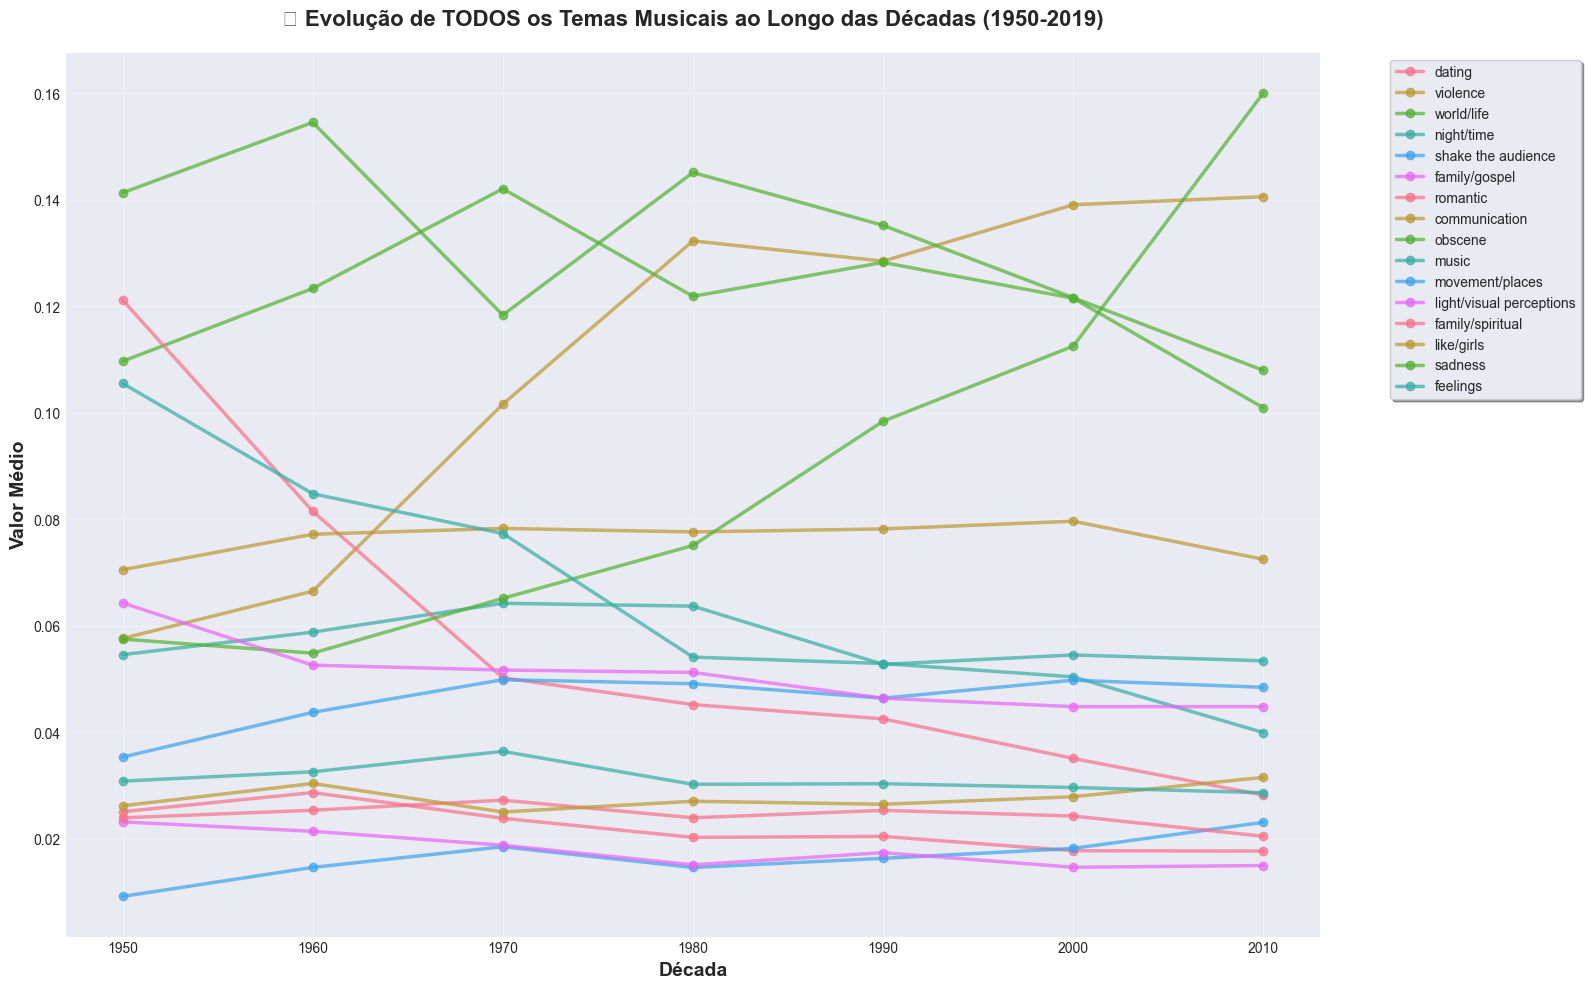

In [ ]:

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')

# Criar figura grande
fig, ax = plt.subplots(figsize=(16, 10))

# Plotar cada tema
for tema in temas_disponiveis:
    ax.plot(temas_por_decada.index, 
            temas_por_decada[tema], 
            marker='o', 
            linewidth=2.5, 
            markersize=6,
            label=tema,
            alpha=0.7)

# Customização
ax.set_xlabel('Década', fontsize=14, fontweight='bold')
ax.set_ylabel('Valor Médio', fontsize=14, fontweight='bold')
ax.set_title('📈 Evolução de TODOS os Temas Musicais ao Longo das Décadas (1950-2019)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
         fontsize=10, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🔍 Interpretação: Evolução Cultural da Música (1950s → 2010s)

Esses dados contam uma história fascinante sobre como a sociedade e a música mudaram em 70 anos!

---

## 🔺 TEMAS QUE MAIS CRESCERAM

### 1. 'obscene' - EXPLOSÃO de +178% 🚀

**Anos 50:** 0.057 (5.7% das músicas)  
**Anos 2010:** 0.160 (16% das músicas)  
**Aumento:** +178%

**O que isso significa:**
- ✅ **Liberalização cultural:** Quebra de tabus, linguagem mais explícita
- ✅ **Influência do Hip-Hop/Rap:** Gêneros com conteúdo mais direto dominaram desde os anos 90
- ✅ **Menos censura:** Artistas têm mais liberdade criativa
- 🎵 **Exemplos:** De Elvis sendo censurado nos anos 50 → Eminem, Cardi B nos anos 2010

**Insight:** A música triplicou em conteúdo explícito! 📈

---

### 2. 'violence' - DOBROU (+144%) ⚡

**Anos 50:** 0.058 (5.8%)  
**Anos 2010:** 0.141 (14.1%)  
**Aumento:** +144%

**O que isso significa:**
- ⚠️ **Reflexo de tensões sociais:** Guerras, desigualdade, criminalidade
- 🎸 **Gêneros mais agressivos:** Heavy Metal, Gangsta Rap, Punk
- 💭 **Temas urbanos:** Vida nas ruas, conflitos, sobrevivência
- 🎵 **Exemplos:** Anos 50 (músicas românticas) → Anos 2010 (drill, trap, metal extremo)

**Insight:** A música ficou mais crua e menos "escapista" 💥

---

### 3. 'shake the audience' - AUMENTOU +152% 🎉

**Anos 50:** 0.009 (0.9%)  
**Anos 2010:** 0.023 (2.3%)  
**Aumento:** +152%

**O que isso significa:**
- 🕺 **Música mais participativa:** Call-to-action, interação com público
- 🎪 **Era dos festivais:** Cultura de shows, EDM, rave
- 📱 **Viralização:** Músicas feitas para dançar em TikTok/Instagram
- 🎵 **Exemplos:** "Twist and Shout" (anos 60) → "Turn Down for What" (anos 2010)

**Insight:** Apesar de crescer muito em %, ainda é minoritário (2.3%) 📊

---

### 4. 'movement/places' - +37% 🗺️

**Anos 50:** 0.035 (3.5%)  
**Anos 2010:** 0.048 (4.8%)  
**Aumento:** +37%

**O que isso significa:**
- ✈️ **Globalização:** Mais referências a lugares, viagens
- 🌍 **Influências multiculturais:** Música latina, africana, asiática no mainstream
- 🚗 **Mobilidade:** Carros, estradas, migração urbana

---

### 5. 'like/girls' - +20% 💕

**Anos 50:** 0.026 (2.6%)  
**Anos 2010:** 0.032 (3.2%)  
**Aumento:** +20%

**O que isso significa:**
- 👀 Objetificação aumentou (levemente)
- 🎵 Tema presente mas não dominante

---

## 🔻 TEMAS QUE MAIS DIMINUÍRAM

### 1. 'romantic' - CAIU -77% 💔

**Anos 50:** 0.121 (12.1%)  
**Anos 2010:** 0.028 (2.8%)  
**Queda:** -77%

**O QUE ISSO SIGNIFICA (MUITO IMPORTANTE!):**
- 💔 **Fim da era das baladas românticas clássicas**
- 🔄 **Amor mudou de abordagem:** Menos idealização, mais realismo/cinismo
- 📉 **Individualismo crescente:** Menos músicas sobre amor eterno
- 🎵 **Transformação:** "Unchained Melody" (anos 50) → "Hotline Bling" (anos 2010)

**Insight CRÍTICO:** O romance DESPENCOU! A música ficou menos sentimental! 🚨

---

### 2. 'music' - CAIU -62% 🎼

**Anos 50:** 0.105 (10.5%)  
**Anos 2010:** 0.040 (4%)  
**Queda:** -62%

**O que isso significa:**
- 🎵 **Menos metalinguagem:** Músicas sobre música eram comuns (jazz, blues)
- 📉 **Temas mais externos:** Menos autorreferência artística
- 🎵 **Antes:** "Music Music Music", "Play That Funky Music"
- 🎵 **Depois:** Outros temas dominaram

---

### 3. 'sadness' - CAIU -24% 😢

**Anos 50:** 0.141 (14.1%)  
**Anos 2010:** 0.108 (10.8%)  
**Queda:** -24%

**O que isso significa (PARADOXAL!):**
- 🤔 **Interessante:** Menos tristeza explícita, MAS...
- ⚠️ **Atenção:** Pode ser que tristeza ficou "disfarçada"
- 💭 **Ou:** Músicas ficaram mais anestesiadas/apáticas que tristes
- 🎵 Blues/folk melancólico → Trap/emo rap (tristeza diferente)

---

### 4. 'light/visual perceptions' - CAIU -30% 💡

**Anos 50:** 0.064 (6.4%)  
**Anos 2010:** 0.045 (4.5%)  
**Queda:** -30%

**O que isso significa:**
- 🌅 **Menos poesia visual:** "Blue moon", "Sunshine", "Starlight"
- 📉 **Letras menos descritivas:** Mais diretas, menos metáforas
- 🎨 **Menos romantismo literário**

---

### 5. 'world/life' - CAIU -8% 🌍

**Anos 50:** 0.110 (11%)  
**Anos 2010:** 0.101 (10.1%)  
**Queda:** -8%

**O que isso significa:**
- ➡️ **Relativamente estável** (queda pequena)
- 💭 Temas existenciais continuam presentes
- Mas menos proeminentes que nos anos 60-70 (era hippie/protesto)

---

## 📊 O QUE ISSO TUDO REVELA?

### 🎭 MUDANÇA CULTURAL DRAMÁTICA

#### ANOS 1950s:
```
🌹 Romântico (12%)
😢 Triste (14%)
🎵 Sobre música (10%)
🌍 Vida/mundo (11%)
💡 Visual/poético (6%)
```
**= Música idealizada, sentimental, poética**

#### ANOS 2010s:
```
🔞 Obsceno (16%)
⚡ Violento (14%)
😢 Triste (11%)
🌍 Vida/mundo (10%)
```
**= Música crua, explícita, direta**

---

## 💡 INSIGHTS PRINCIPAIS PARA SUA APRESENTAÇÃO

### 1. A Morte do Romance Clássico 💔
> "O tema romântico despencou 77% em 70 anos. Passamos de baladas idealizadas sobre amor eterno para abordagens mais realistas, cínicas ou sexualizadas."

### 2. A Ascensão do Explícito 🚀
> "Conteúdo obsceno e violência MAIS QUE DOBRARAM. A música reflete uma sociedade menos reprimida, mas também mais confrontativa e menos filtrada."

### 3. Menos Poesia, Mais Realidade 📉
> "Temas visuais/poéticos e metalinguagem declinaram. As letras ficaram mais diretas, menos metafóricas. A arte se tornou mais acessível, mas perdeu camadas de significado?"

### 4. Do Sentimentalismo ao Cinismo 🔄
> "Saímos de uma era sentimental (romance, tristeza explícita) para uma era mais crua (obscenidade, violência). A música deixou de ser 'escape' para ser 'espelho'."

C:\Users\Yasmin\AppData\Local\Temp\ipykernel_3204\3080957732.py:33: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Yasmin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


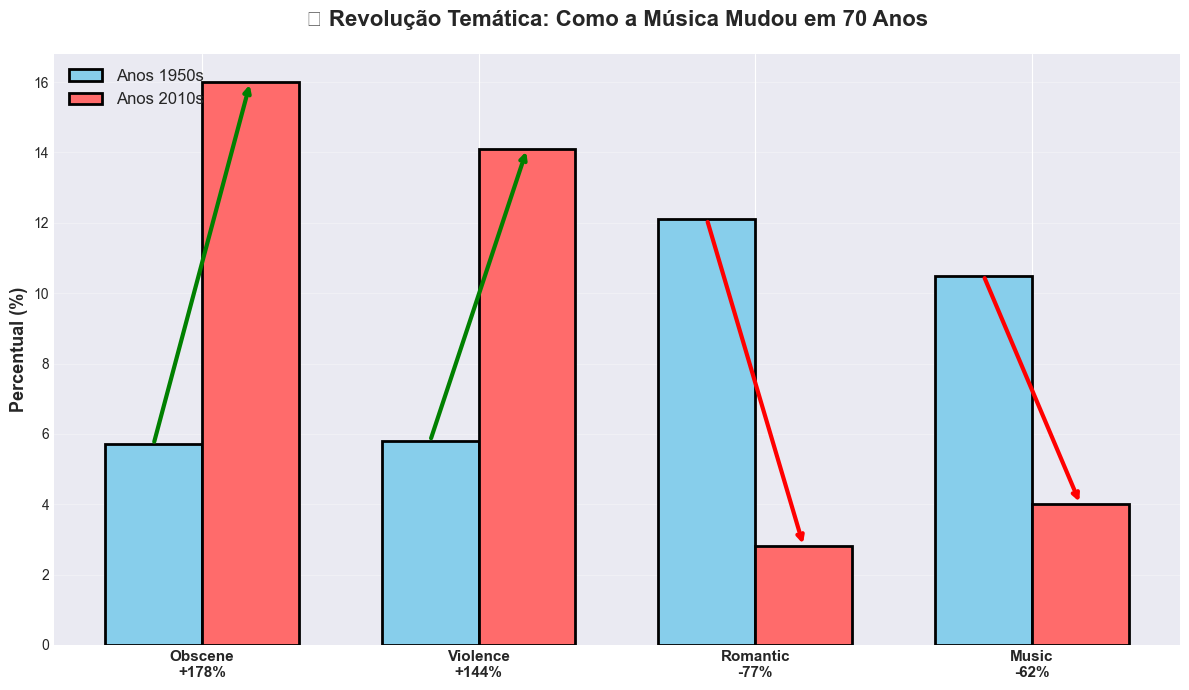

In [ ]:


# Dados dos extremos
temas_labels = ['Obscene\n+178%', 'Violence\n+144%', 'Romantic\n-77%', 'Music\n-62%']
valores_1950 = [5.7, 5.8, 12.1, 10.5]
valores_2010 = [16.0, 14.1, 2.8, 4.0]

x = np.arange(len(temas_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width/2, valores_1950, width, label='Anos 1950s', 
               color='#87CEEB', edgecolor='black', linewidth=2)
bars2 = ax.bar(x + width/2, valores_2010, width, label='Anos 2010s', 
               color='#FF6B6B', edgecolor='black', linewidth=2)

# Adicionar setas de mudança
for i, (v1, v2) in enumerate(zip(valores_1950, valores_2010)):
    if v2 > v1:
        ax.annotate('', xy=(i + width/2, v2), xytext=(i - width/2, v1),
                   arrowprops=dict(arrowstyle='->', lw=3, color='green'))
    else:
        ax.annotate('', xy=(i + width/2, v2), xytext=(i - width/2, v1),
                   arrowprops=dict(arrowstyle='->', lw=3, color='red'))

ax.set_ylabel('Percentual (%)', fontsize=13, fontweight='bold')
ax.set_title('🎭 Revolução Temática: Como a Música Mudou em 70 Anos', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(temas_labels, fontsize=11, fontweight='bold')
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

C:\Users\Yasmin\AppData\Local\Temp\ipykernel_3204\1328919476.py:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Yasmin\AppData\Local\Temp\ipykernel_3204\1328919476.py:45: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Yasmin\AppData\Local\Temp\ipykernel_3204\1328919476.py:45: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Yasmin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Yasmin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Yasmin\AppData\Local\Programs\Python\Python313\Lib\site-packages\

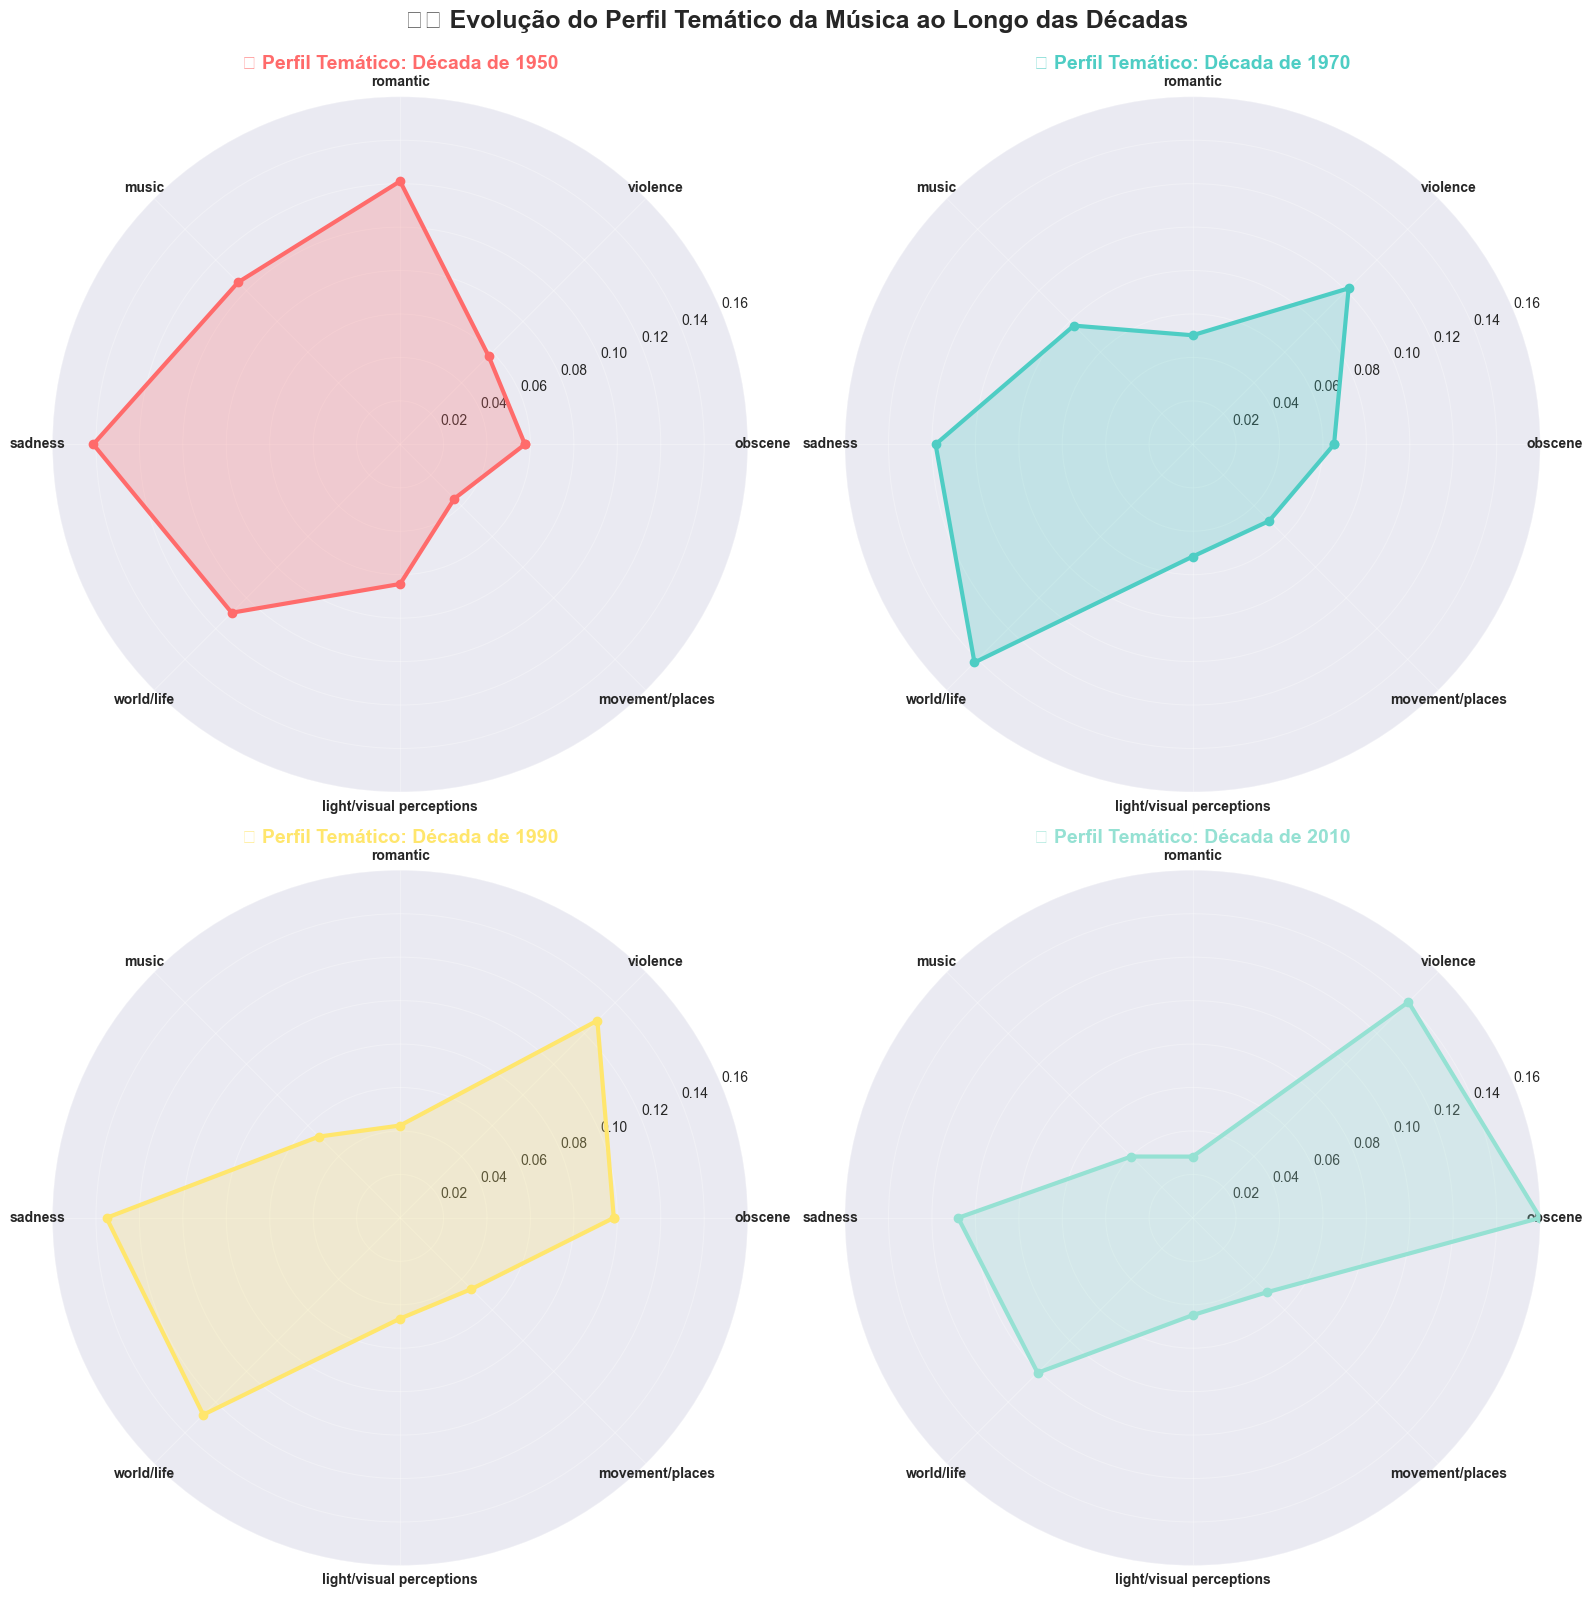

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Selecionar algumas décadas para comparar
decadas_selecionadas = [1950, 1970, 1990, 2010]

# Selecionar top 8 temas mais variados
variacao = temas_por_decada.std()
top_temas = variacao.nlargest(8).index.tolist()

# Preparar dados
dados_radar = temas_por_decada.loc[decadas_selecionadas, top_temas]

# Número de variáveis
num_vars = len(top_temas)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 16), subplot_kw=dict(projection='polar'))
axes = axes.flatten()

cores = ['#FF6B6B', '#4ECDC4', '#FFE66D', '#95E1D3']

for idx, (decada, ax, cor) in enumerate(zip(decadas_selecionadas, axes, cores)):
    # Pegar valores
    values = dados_radar.loc[decada].values.tolist()
    values += values[:1]
    
    # Plot
    ax.plot(angles, values, 'o-', linewidth=3, color=cor, label=f'{int(decada)}s')
    ax.fill(angles, values, alpha=0.25, color=cor)
    
    # Configuração
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(top_temas, size=10, fontweight='bold')
    ax.set_ylim(0, dados_radar.max().max())
    ax.set_title(f'📊 Perfil Temático: Década de {int(decada)}', 
                 fontsize=14, fontweight='bold', pad=20, color=cor)
    ax.grid(True, alpha=0.3)

plt.suptitle('🕸️ Evolução do Perfil Temático da Música ao Longo das Décadas', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

C:\Users\Yasmin\AppData\Local\Temp\ipykernel_3204\3677405715.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\Yasmin\AppData\Local\Temp\ipykernel_3204\3677405715.py:24: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
c:\Users\Yasmin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Yasmin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


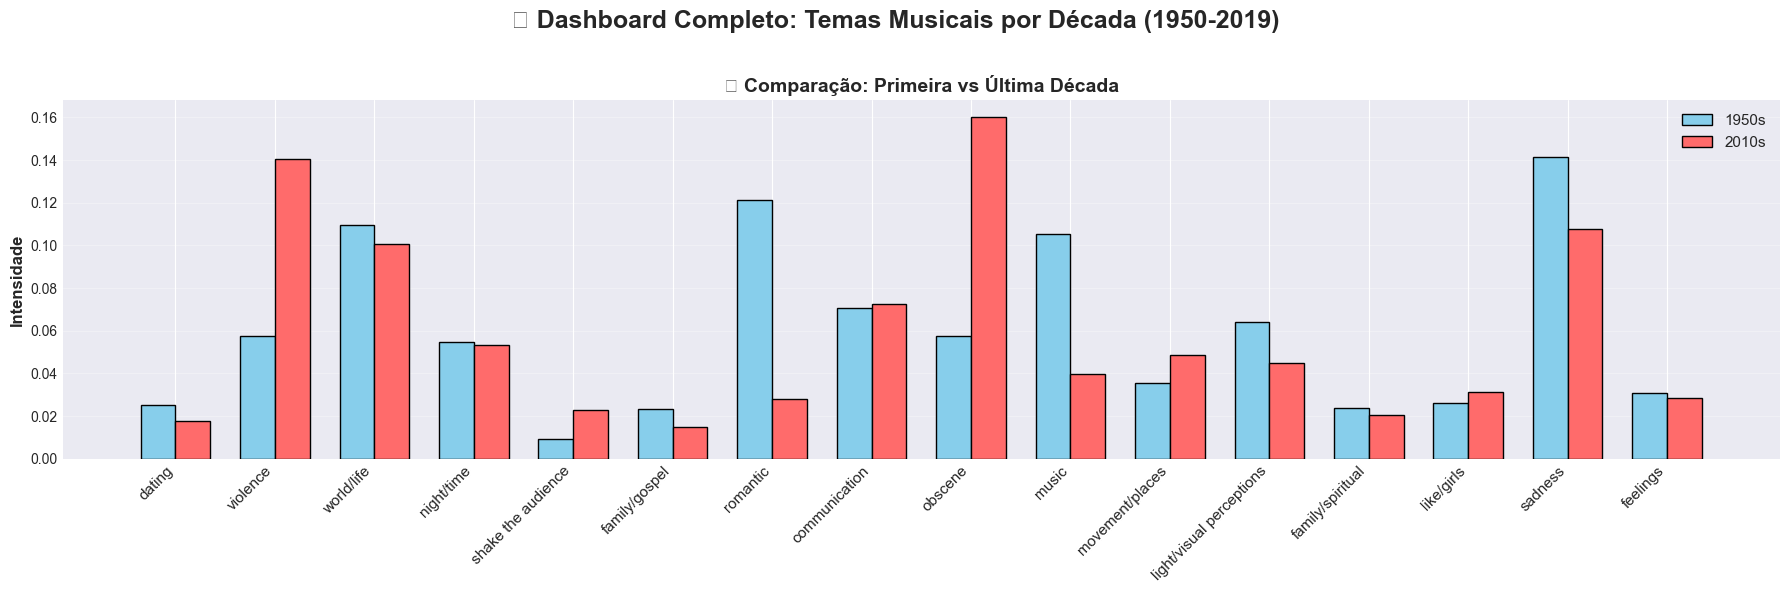

In [ ]:
fig = plt.figure(figsize=(18, 6))
gs = fig.add_gridspec(1, 1)        
ax = fig.add_subplot(gs[0, 0])

x = range(len(temas_disponiveis))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], primeira_decada, width,
               label=f'{int(temas_por_decada.index[0])}s', color='#87CEEB',
               edgecolor='black', linewidth=1)
bars2 = ax.bar([i + width/2 for i in x], ultima_decada, width,
               label=f'{int(temas_por_decada.index[-1])}s', color='#FF6B6B',
               edgecolor='black', linewidth=1)

ax.set_xticks(x)
ax.set_xticklabels(temas_disponiveis, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Intensidade', fontsize=12, fontweight='bold')
ax.set_title('📊 Comparação: Primeira vs Última Década', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('🎵 Dashboard Completo: Temas Musicais por Década (1950-2019)',
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()